In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import numpy as np


from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

In [2]:
fc_train_path = "F:\ML LEARNING\FaultClassify.csv"
fc_test_path = "F:\ML LEARNING\FaultClassifyTest.csv"

fd_train_path = "F:\ML LEARNING\FaultZoning.csv"
fd_test_path = "F:\ML LEARNING\FaultZoningTest.csv" 

In [3]:
fc_train = pd.read_csv(fc_train_path)
fc_test = pd.read_csv(fc_test_path)

fd_train = pd.read_csv(fd_train_path)
fd_test = pd.read_csv(fd_test_path)

In [4]:
fc_train = shuffle(fc_train,random_state=1)
fc_test = shuffle(fc_test,random_state=1)

fd_train = shuffle(fd_train,random_state=1)
fd_test = shuffle(fd_test,random_state=1)

In [5]:
train = fd_train.sample(frac=1,random_state=0)
test = fd_test.sample(frac=1,random_state=0)

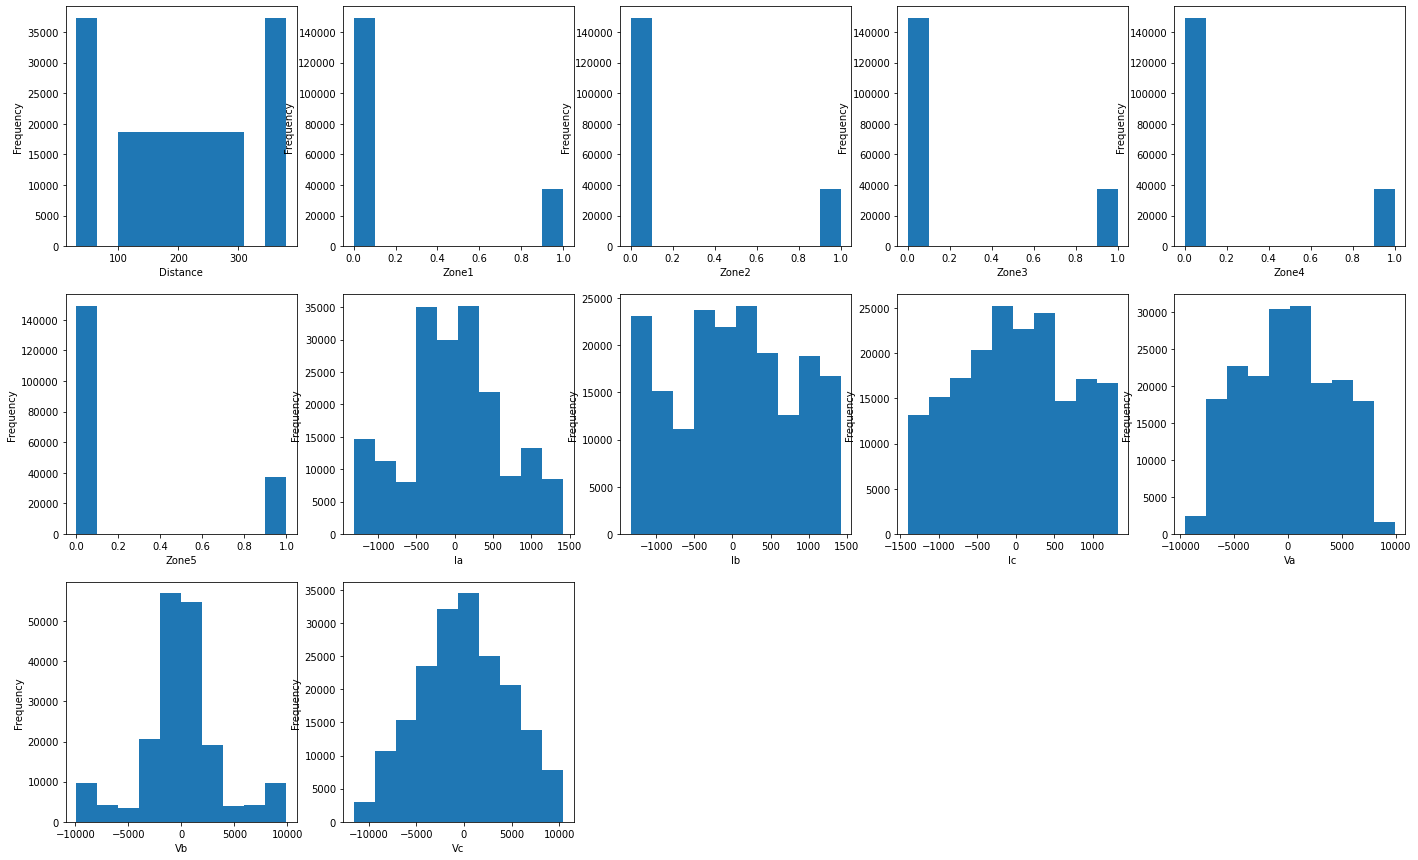

In [6]:
fig = plt.figure(figsize=(24,15))
i = 0
for column in train:
    sub = fig.add_subplot(3,5,i+1)
    sub.set_xlabel(column)
    train[column].plot(kind='hist')
    i = i+1

In [7]:
train.columns

Index(['Distance', 'Zone1', 'Zone2', 'Zone3', 'Zone4', 'Zone5', 'Ia', 'Ib',
       'Ic', 'Va', 'Vb', 'Vc'],
      dtype='object')

In [8]:
target_cols = ['Zone1', 'Zone2', 'Zone3', 'Zone4', 'Zone5']
features = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

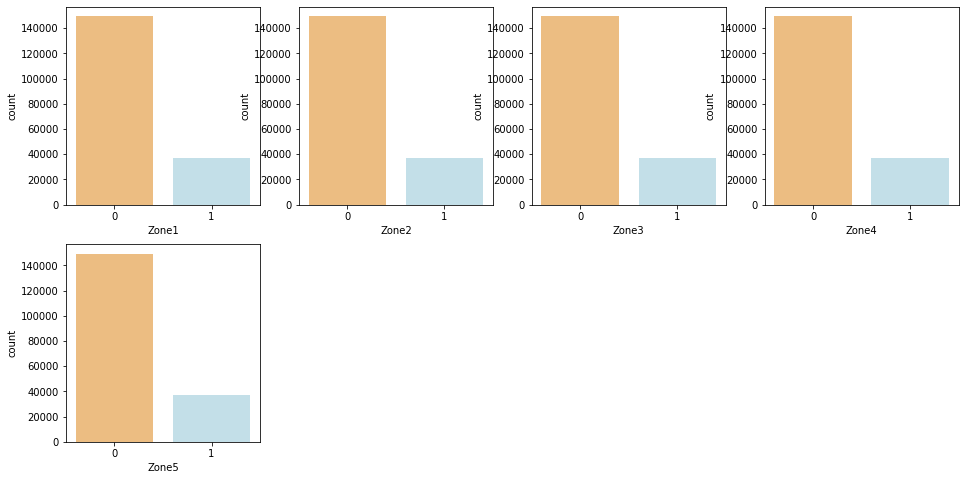

In [9]:
fig = plt.figure(figsize=(16,8))
for i in range(len(target_cols)):
    column = target_cols[i]
    sub = fig.add_subplot(2,4,i+1)
    chart = sns.countplot(data = train, x = column,  palette = 'RdYlBu')

In [10]:
X_train = train[features]
Y_train = train[target_cols]

In [11]:
X_test = test[features]
Y_test = test[target_cols]

In [12]:
accuracy = []
error = []

In [13]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, Y_train)
Y_pred = xgb_model.predict(X_test)
accuracy.append(accuracy_score(Y_test, Y_pred))
error.append(mean_squared_error(Y_test, Y_pred))

In [14]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)
accuracy.append(accuracy_score(Y_test, Y_pred))
error.append(mean_squared_error(Y_test, Y_pred))

In [15]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
accuracy.append(accuracy_score(Y_test, Y_pred))
error.append(mean_squared_error(Y_test, Y_pred))

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
accuracy.append(accuracy_score(Y_test, Y_pred))
error.append(mean_squared_error(Y_test, Y_pred))

In [17]:
accuracy

[0.7482241388546633,
 0.8310708737343976,
 0.8962929233406546,
 0.9359190014464027]

In [18]:
error

[0.06787700219638934,
 0.06757165050624095,
 0.03563936358279316,
 0.023939572507633795]

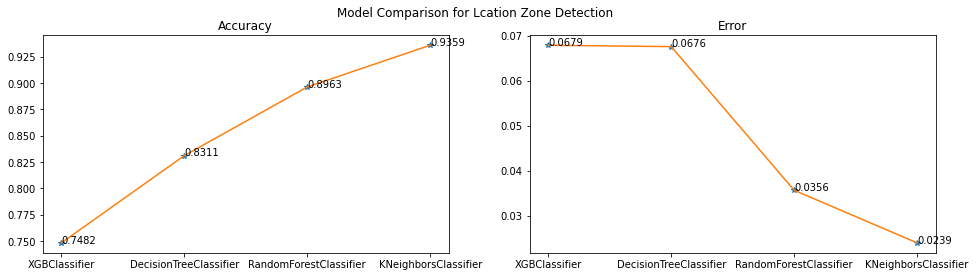

In [19]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Model Comparison for Lcation Zone Detection')
x = [0,1,2,3]

ax[0].set_xticks([0,1,2,3])
ax[0].set_xticklabels(['XGBClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier','KNeighborsClassifier'])
ax[0].set_title('Accuracy')
ax[0].plot(accuracy,'*')
ax[0].plot(accuracy)
for i in range(len(accuracy)):
    accuracy[i] = round(accuracy[i],4)
for i,j in zip(x,accuracy):
    ax[0].annotate(str(j),xy=(i,j))

ax[1].set_xticks([0,1,2,3])
ax[1].set_xticklabels(['XGBClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier','KNeighborsClassifier'])
ax[1].set_title('Error')
ax[1].plot(error,'*')
ax[1].plot(error)
for i in range(len(error)):
    error[i] = round(error[i],4)
for i,j in zip(x,error):
    ax[1].annotate(str(j),xy=(i,j))